In [1]:
library(tidyverse)
library(dplyr)
library(ggpubr)
library(car)
library(tidyverse)
library(ggpubr)
library(rstatix)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some



Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter




In [2]:
df = read_csv('/home/fer/Documents/cfDNA/Clinical/Treatment.csv')
df

New names:
• `` -> `...5`
• `` -> `...6`
• `` -> `...7`
• `` -> `...8`
• `` -> `...9`
• `` -> `...10`
• `` -> `...11`
• `` -> `...12`
• `` -> `...13`
Rows: 19 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): ID, Treatment, TreatmentV2, ...10, ...12, ...13
dbl (2): Concentration, ...11
lgl (5): ...5, ...6, ...7, ...8, ...9

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ID,Concentration,Treatment,TreatmentV2,...5,...6,...7,...8,...9,...10,...11,...12,...13
<chr>,<dbl>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<dbl>,<chr>,<chr>
UEB-0228,0.48,Surgery,SX,NA,NA,NA,NA,NA,NA,NA,NA,NA
UEB-0205,0.81,Rad and Chem,RTX-AC,NA,NA,NA,NA,NA,NA,NA,NA,NA
UEB-0208,0.88,Chemotherapy,NAC,NA,NA,NA,NA,NA,NA,NA,NA,NA
UEB-0209,0.36,Surgery,SX,NA,NA,NA,NA,NA,NA,NA,NA,NA
UEB-0210,1.27,Rad and Chem,RTX-NAC,NA,NA,NA,NA,NA,NA,NA,NA,NA
UEB-0211,1.07,Rad and Chem,RTX-NAC,NA,NA,NA,NA,NA,NA,NA,NA,NA
UEB-0213,0.32,Rad and Chem,RTX-NAC,NA,NA,NA,NA,NA,NA,NA,NA,NA
UEB-0214,1.55,Radiotherapy,RTX,NA,NA,NA,NA,NA,NA,NA,NA,NA
UEB-0215,0.56,Surgery,SX,NA,NA,NA,NA,NA,AC,1.0,NA,NA


In [3]:
shapiro.test(df$Concentration)


	Shapiro-Wilk normality test

data:  df$Concentration
W = 0.76559, p-value = 0.0003768


In [4]:
df %>% filter(TreatmentV2 == 'NAC')

ID,Concentration,Treatment,TreatmentV2,...5,...6,...7,...8,...9,...10,...11,...12,...13
<chr>,<dbl>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<dbl>,<chr>,<chr>
UEB-0208,0.88,Chemotherapy,NAC,NA,NA,NA,NA,NA,NA,NA,NA,NA
UEB-0221,1.27,Chemotherapy,NAC,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [5]:
t = df$TreatmentV2
T = t[!duplicated(t)]

#Excluir NAC y AC por tener <2 muestras
T = T[-c(3,6)]
T

[1] "SX"      "RTX-AC"  "RTX-NAC" "RTX"

In [6]:
for (i in T) {
    df_i = df %>% filter(TreatmentV2 == i)
    print(i)
    print(shapiro.test(df_i$Concentration))
}

[1] "SX"

	Shapiro-Wilk normality test

data:  df_i$Concentration
W = 0.98697, p-value = 0.9681

[1] "RTX-AC"

	Shapiro-Wilk normality test

data:  df_i$Concentration
W = 0.98782, p-value = 0.7888

[1] "RTX-NAC"

	Shapiro-Wilk normality test

data:  df_i$Concentration
W = 0.8995, p-value = 0.3839

[1] "RTX"

	Shapiro-Wilk normality test

data:  df_i$Concentration
W = 0.88941, p-value = 0.3804



In [7]:
 kruskal.test(df$Concentration ~ df$TreatmentV2, data = df)


	Kruskal-Wallis rank sum test

data:  df$Concentration by df$TreatmentV2
Kruskal-Wallis chi-squared = 7.9541, df = 5, p-value = 0.1588


In [8]:
leveneTest(df$Concentration ~ df$TreatmentV2, df)

Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,5,3.471841,0.03268624
,13,NA,NA


In [9]:
anova <- aov(df$Concentration ~ df$TreatmentV2)
summary(anova)

               Df Sum Sq Mean Sq F value Pr(>F)  
df$TreatmentV2  5  4.658  0.9315   3.539 0.0307 *
Residuals      13  3.422  0.2632                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

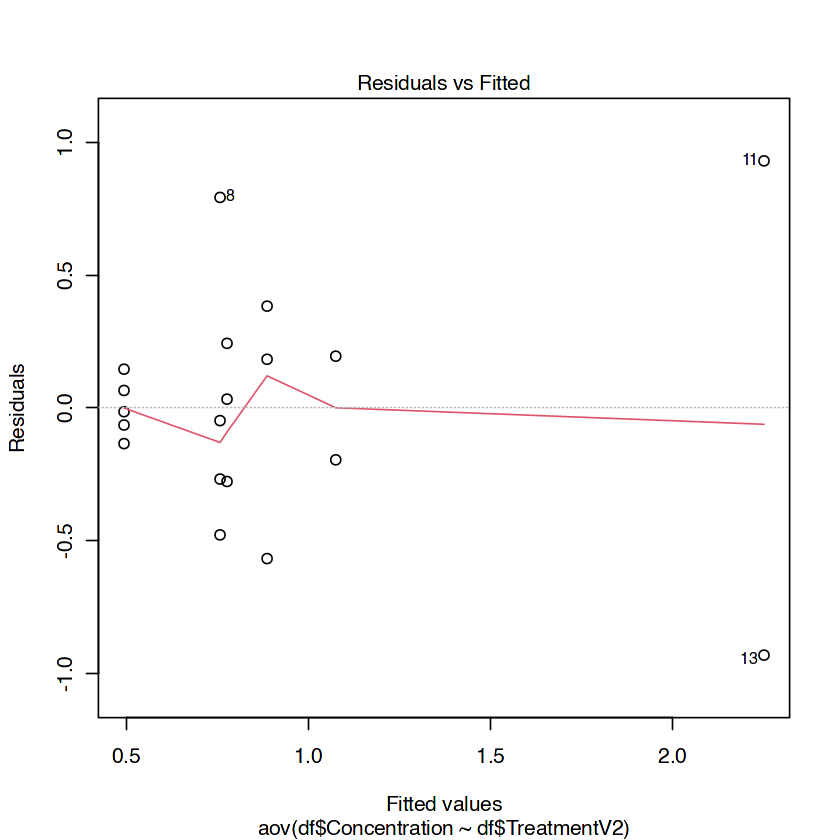

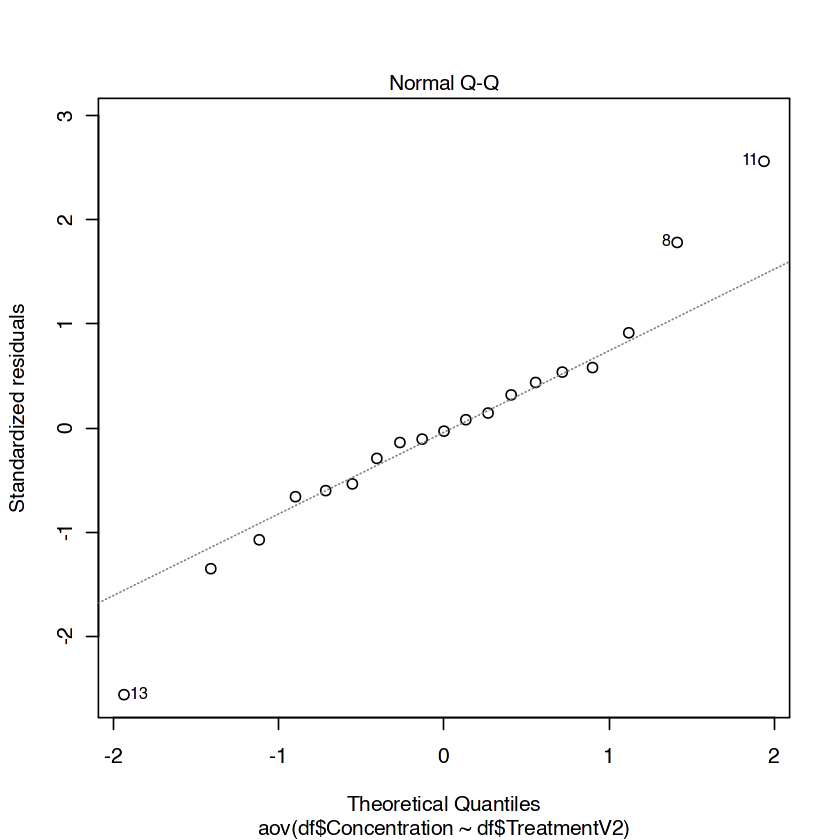

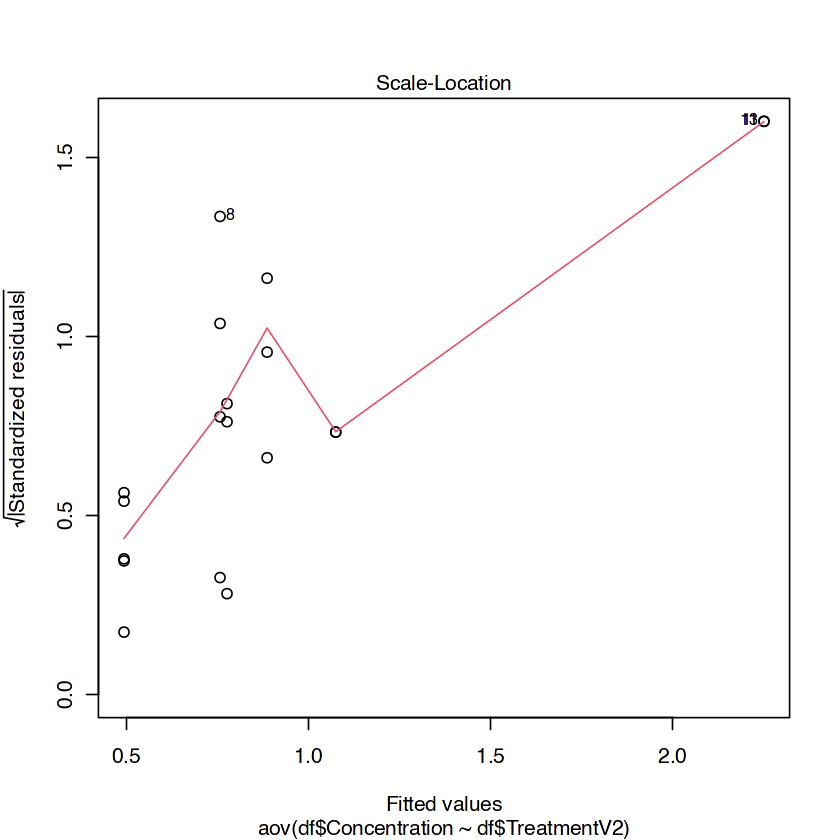

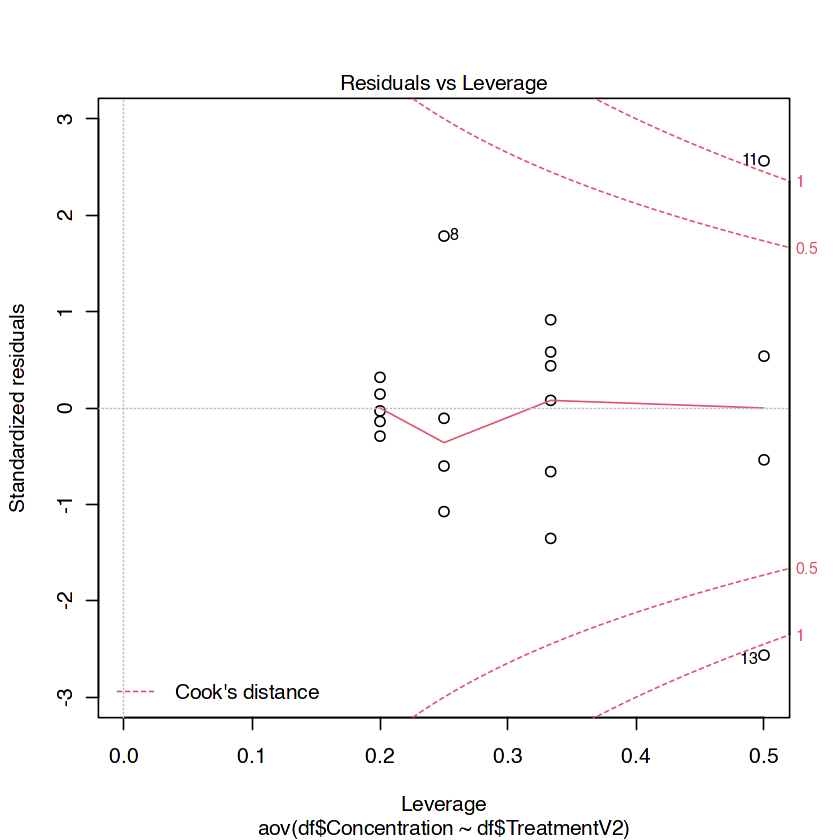

In [10]:
plot(anova)

In [12]:
Tuke55yHSD(anova, conf.level=.95)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = df$Concentration ~ df$TreatmentV2)

$`df$TreatmentV2`
                      diff       lwr         upr     p adj
NAC-AC         -1.17500000 -2.876412  0.52641179 0.2644334
RTX-AC         -1.49250000 -2.965966 -0.01903417 0.0464064
RTX-AC-AC      -1.47333333 -3.026503  0.07983603 0.0671212
RTX-NAC-AC     -1.36333333 -2.916503  0.18983603 0.0998986
SX-AC          -1.75600000 -3.179503 -0.33249677 0.0127727
RTX-NAC        -0.31750000 -1.790966  1.15596583 0.9766812
RTX-AC-NAC     -0.29833333 -1.851503  1.25483603 0.9858653
RTX-NAC-NAC    -0.18833333 -1.741503  1.36483603 0.9983068
SX-NAC         -0.58100000 -2.004503  0.84250323 0.7520403
RTX-AC-RTX      0.01916667 -1.280308  1.31864138 0.9999999
RTX-NAC-RTX     0.12916667 -1.170308  1.42864138 0.9993478
SX-RTX         -0.26350000 -1.404842  0.87784173 0.9687609
RTX-NAC-RTX-AC  0.11000000 -1.279197  1.49919691 0.9997844
SX-RTX-AC      -0.2826666

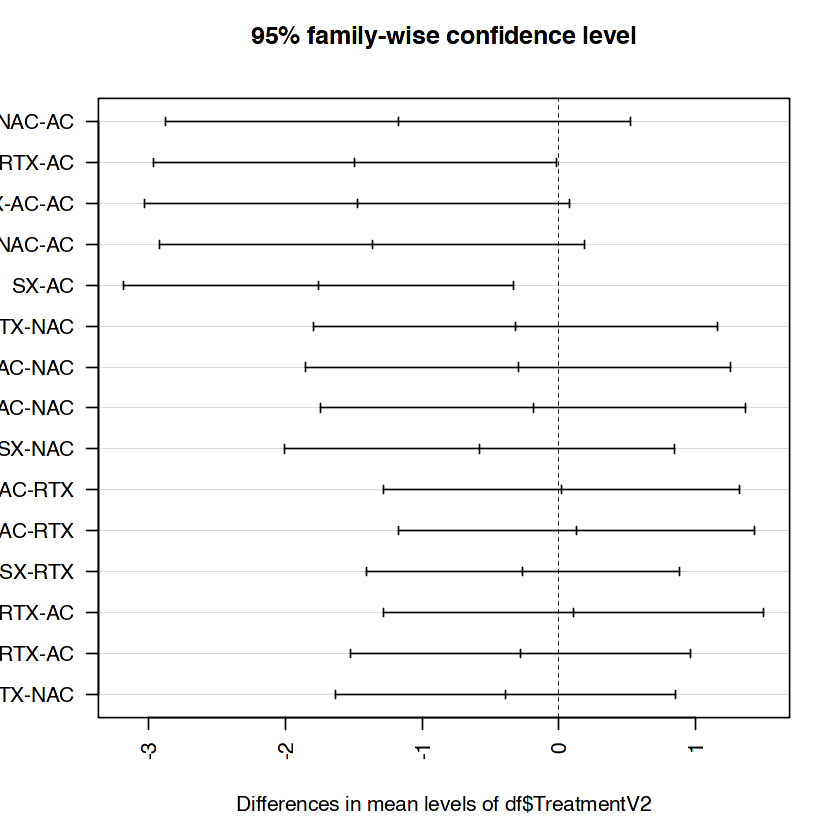

In [13]:
plot(TukeyHSD(anova, conf.level=.95), las = 2)

In [2]:
df = read_csv('/home/fer/Documents/cfDNA/Clinical/Concentracion_cfDNA.csv')
df

Rows: 20 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): ID, Stage
dbl (1): Concentration

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ID,Stage,Concentration
<chr>,<chr>,<dbl>
UEB-0205,I,0.81
UEB-0208,I,0.88
UEB-0209,II,0.36
UEB-0210,II,1.27
UEB-0211,III,1.07
UEB-0213,II,0.32
UEB-0215,III,0.56
UEB-0216,I,0.50
UEB-0218,III,3.18


In [13]:
t = df$Stage
T = t[!duplicated(t)]

#Excluir NAC y AC por tener <2 muestras
T = T[-4]
T

[1] "I"   "II"  "III"

In [14]:
for (i in T) {
    df_i = df %>% filter(Stage == i)
    print(i)
    print(shapiro.test(df_i$Concentration))
}

[1] "I"

	Shapiro-Wilk normality test

data:  df_i$Concentration
W = 0.88264, p-value = 0.3322

[1] "II"

	Shapiro-Wilk normality test

data:  df_i$Concentration
W = 0.84826, p-value = 0.09148

[1] "III"

	Shapiro-Wilk normality test

data:  df_i$Concentration
W = 0.7549, p-value = 0.03302

